## Geopandas y operaciones GIS

### @author: Roberto mendoza

In [62]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString, Polygon, MultiLineString
from shapely import ops

import contextily as cx  # import street map
from pyproj import CRS
import matplotlib.patches as mpatches
import haversine as hs
from tqdm import tqdm
from matplotlib.lines import Line2D


import warnings
warnings.filterwarnings('ignore') # eliminar warning messages 

## 1.0 Polygonos 

In [63]:
# Load .gdb dataset.
# La particuladridad es que almacena basese de datos por capas. Podemos acceder a cada una de ellas con layer
# El layer 5 contiene el shapefile de polygono de cada distrito 

dist_mita = gpd.read_file(r'..\data\Mita\mita.gdb', layer=5
                         )
dist_mita

,NOMBRE,CAPITAL,CODIGO_DEP,CODIGO_PRO,CODIGO_DIS,Shape_Length,Shape_Area,geometry
0,CHALLABAMBA,CHALLABAMBA,08,0811,081103,131192.806716,7.267251e+08,"MULTIPOLYGON (((857190.750 8528462.000, 857160..."
1,OLLANTAYTAMBO,OLLANTAYTAMBO,08,0813,081306,168695.833626,5.835061e+08,"MULTIPOLYGON (((808891.875 8541746.000, 808841..."
2,CALCA,CALCA,08,0804,080401,93156.325541,3.369452e+08,"MULTIPOLYGON (((840558.000 8540224.000, 840553..."
3,HUACCANA,HUACCANA,03,0306,030604,126683.711172,4.792552e+08,"MULTIPOLYGON (((654318.750 8525047.000, 654191..."
4,URUBAMBA,URUBAMBA,08,0813,081301,57625.667830,1.621469e+08,"MULTIPOLYGON (((808891.875 8541746.000, 809037..."
...,...,...,...,...,...,...,...,...
291,MAÑAZO,MAÑAZO,21,2101,210109,125389.537492,4.041158e+08,"MULTIPOLYGON (((1002575.875 8254569.500, 10026..."
292,TIQUILLACA,TIQUILLACA,21,2101,210114,143747.469392,4.917097e+08,"MULTIPOLYGON (((1019870.000 8252512.000, 10200..."
293,IRAY,IRAY,04,0406,040605,80929.450466,2.381925e+08,"MULTIPOLYGON (((762927.250 8250735.500, 763048..."
294,PUNO,PUNO,21,2101,210101,117526.191666,4.626152e+08,"MULTIPOLYGON (((1020096.500 8222314.500, 10199..."


In [64]:
dist_mita.crs

# sistema de coordenadas proyectadas en un plano cartesiano (unidad de medida en metros) bajo el método Transverse Mercator
# compatible para países de Argentina, Brazil, Chile, Colombia, Ecuadro y Peru

<Derived Projected CRS: EPSG:32718>
Name: WGS 84 / UTM zone 18S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Brazil. Chile. Colombia. Ecuador. Peru.
- bounds: (-78.0, -80.0, -72.0, 0.0)
Coordinate Operation:
- name: UTM zone 18S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Sistema de coordendas proyectada usada en la Mita 

[link](https://epsg.io/32718)

In [65]:
# Conversión de sistemas
# del sistema EPSG:32718 hacia el sistema de coordenadas estándar EPSG:4326 (WGS84)

# El WGS 84 es un sistema geodésico de coordenadas geográficas usado mundialmente,
# que permite localizar cualquier punto de la Tierra por medio de tres unidades dadas.


dist_mita.to_crs(epsg=4326,inplace=True)
dist_mita

,NOMBRE,CAPITAL,CODIGO_DEP,CODIGO_PRO,CODIGO_DIS,Shape_Length,Shape_Area,geometry
0,CHALLABAMBA,CHALLABAMBA,08,0811,081103,131192.806716,7.267251e+08,"MULTIPOLYGON (((-71.70391 -13.28971, -71.70419..."
1,OLLANTAYTAMBO,OLLANTAYTAMBO,08,0813,081306,168695.833626,5.835061e+08,"MULTIPOLYGON (((-72.15058 -13.17512, -72.15105..."
2,CALCA,CALCA,08,0804,080401,93156.325541,3.369452e+08,"MULTIPOLYGON (((-71.85859 -13.18546, -71.85863..."
3,HUACCANA,HUACCANA,03,0306,030604,126683.711172,4.792552e+08,"MULTIPOLYGON (((-73.57512 -13.33796, -73.57629..."
4,URUBAMBA,URUBAMBA,08,0813,081301,57625.667830,1.621469e+08,"MULTIPOLYGON (((-72.15058 -13.17512, -72.14922..."
...,...,...,...,...,...,...,...,...
291,MAÑAZO,MAÑAZO,21,2101,210109,125389.537492,4.041158e+08,"MULTIPOLYGON (((-70.31324 -15.73702, -70.31223..."
292,TIQUILLACA,TIQUILLACA,21,2101,210114,143747.469392,4.917097e+08,"MULTIPOLYGON (((-70.15193 -15.75203, -70.15064..."
293,IRAY,IRAY,04,0406,040605,80929.450466,2.381925e+08,"MULTIPOLYGON (((-72.54551 -15.80829, -72.54436..."
294,PUNO,PUNO,21,2101,210101,117526.191666,4.626152e+08,"MULTIPOLYGON (((-70.14329 -16.02400, -70.14468..."


In [66]:
dist_mita.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [67]:
# Proyección cilindrica equidistante 
    
mita_proy_cil = dist_mita.to_crs(epsg=4087)
mita_proy_cil

,NOMBRE,CAPITAL,CODIGO_DEP,CODIGO_PRO,CODIGO_DIS,Shape_Length,Shape_Area,geometry
0,CHALLABAMBA,CHALLABAMBA,08,0811,081103,131192.806716,7.267251e+08,"MULTIPOLYGON (((-7982042.758 -1479404.044, -79..."
1,OLLANTAYTAMBO,OLLANTAYTAMBO,08,0813,081306,168695.833626,5.835061e+08,"MULTIPOLYGON (((-8031765.727 -1466648.191, -80..."
2,CALCA,CALCA,08,0804,080401,93156.325541,3.369452e+08,"MULTIPOLYGON (((-7999261.630 -1467798.342, -79..."
3,HUACCANA,HUACCANA,03,0306,030604,126683.711172,4.792552e+08,"MULTIPOLYGON (((-8190344.621 -1484775.243, -81..."
4,URUBAMBA,URUBAMBA,08,0813,081301,57625.667830,1.621469e+08,"MULTIPOLYGON (((-8031765.727 -1466648.191, -80..."
...,...,...,...,...,...,...,...,...
291,MAÑAZO,MAÑAZO,21,2101,210109,125389.537492,4.041158e+08,"MULTIPOLYGON (((-7827234.006 -1751837.159, -78..."
292,TIQUILLACA,TIQUILLACA,21,2101,210114,143747.469392,4.917097e+08,"MULTIPOLYGON (((-7809277.294 -1753508.094, -78..."
293,IRAY,IRAY,04,0406,040605,80929.450466,2.381925e+08,"MULTIPOLYGON (((-8075729.629 -1759770.742, -80..."
294,PUNO,PUNO,21,2101,210101,117526.191666,4.626152e+08,"MULTIPOLYGON (((-7808315.431 -1783783.562, -78..."


In [68]:
mita_proy_cil.crs


<Derived Projected CRS: EPSG:4087>
Name: WGS 84 / World Equidistant Cylindrical
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World Equidistant Cylindrical
- method: Equidistant Cylindrical
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [69]:
# Se retorna al sistema de coordenadas iniciales

mita_cartesiano = dist_mita.to_crs(epsg=32718)
mita_cartesiano

,NOMBRE,CAPITAL,CODIGO_DEP,CODIGO_PRO,CODIGO_DIS,Shape_Length,Shape_Area,geometry
0,CHALLABAMBA,CHALLABAMBA,08,0811,081103,131192.806716,7.267251e+08,"MULTIPOLYGON (((857190.750 8528462.000, 857160..."
1,OLLANTAYTAMBO,OLLANTAYTAMBO,08,0813,081306,168695.833626,5.835061e+08,"MULTIPOLYGON (((808891.875 8541746.000, 808841..."
2,CALCA,CALCA,08,0804,080401,93156.325541,3.369452e+08,"MULTIPOLYGON (((840558.000 8540224.000, 840553..."
3,HUACCANA,HUACCANA,03,0306,030604,126683.711172,4.792552e+08,"MULTIPOLYGON (((654318.750 8525047.000, 654191..."
4,URUBAMBA,URUBAMBA,08,0813,081301,57625.667830,1.621469e+08,"MULTIPOLYGON (((808891.875 8541746.000, 809037..."
...,...,...,...,...,...,...,...,...
291,MAÑAZO,MAÑAZO,21,2101,210109,125389.537492,4.041158e+08,"MULTIPOLYGON (((1002575.875 8254569.500, 10026..."
292,TIQUILLACA,TIQUILLACA,21,2101,210114,143747.469392,4.917097e+08,"MULTIPOLYGON (((1019870.000 8252512.000, 10200..."
293,IRAY,IRAY,04,0406,040605,80929.450466,2.381925e+08,"MULTIPOLYGON (((762927.250 8250735.500, 763048..."
294,PUNO,PUNO,21,2101,210101,117526.191666,4.626152e+08,"MULTIPOLYGON (((1020096.500 8222314.500, 10199..."


## 2.0 Point

In [70]:
# Coordenad de las capitales de los distritos dentro de la MITA minera

centroids = gpd.read_file(r'..\data\Mita\mita.gdb', layer=0
                         )
centroids 

,LAT,LON,UBIGEO,NEAR_FID,NEAR_DIST,geometry
0,-16.099444,-70.282500,210113.0,1,6.259442e+05,POINT (294757.386 -1792181.957)
1,-15.928056,-71.102778,40514.0,1,7.087384e+05,POINT (205784.825 -1773103.034)
2,-15.852500,-72.623889,40605.0,1,8.531851e+05,POINT (40795.410 -1764692.228)
3,-15.837500,-70.021667,210101.0,1,6.231187e+05,POINT (323049.033 -1763022.435)
4,-15.835000,-72.651667,40601.0,1,8.567653e+05,POINT (37782.455 -1762744.137)
...,...,...,...,...,...,...
300,-13.319444,-71.955833,80401.0,1,9.689782e+05,POINT (113256.978 -1482713.773)
301,-13.310556,-72.117222,81301.0,1,9.819171e+05,POINT (95751.710 -1481724.267)
302,-13.266667,-72.266667,81306.0,1,9.968202e+05,POINT (79542.011 -1476838.578)
303,-13.210833,-71.646389,81103.0,1,9.549290e+05,POINT (146821.296 -1470623.239)


In [71]:
centroids.crs

<Derived Projected CRS: PROJCS["mita_equi",GEOGCS["WGS 84",DATUM["WGS_1984 ...>
Name: mita_equi
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Equidistant Cylindrical
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [72]:
# De columnas de latitud longitud al objeto geometry (Point)

centroids['Point'] = gpd.points_from_xy(centroids.LON, centroids.LAT, crs="EPSG:4326")
centroids

,LAT,LON,UBIGEO,NEAR_FID,NEAR_DIST,geometry,Point
0,-16.099444,-70.282500,210113.0,1,6.259442e+05,POINT (294757.386 -1792181.957),POINT (-70.28250 -16.09944)
1,-15.928056,-71.102778,40514.0,1,7.087384e+05,POINT (205784.825 -1773103.034),POINT (-71.10278 -15.92806)
2,-15.852500,-72.623889,40605.0,1,8.531851e+05,POINT (40795.410 -1764692.228),POINT (-72.62389 -15.85250)
3,-15.837500,-70.021667,210101.0,1,6.231187e+05,POINT (323049.033 -1763022.435),POINT (-70.02167 -15.83750)
4,-15.835000,-72.651667,40601.0,1,8.567653e+05,POINT (37782.455 -1762744.137),POINT (-72.65167 -15.83500)
...,...,...,...,...,...,...,...
300,-13.319444,-71.955833,80401.0,1,9.689782e+05,POINT (113256.978 -1482713.773),POINT (-71.95583 -13.31944)
301,-13.310556,-72.117222,81301.0,1,9.819171e+05,POINT (95751.710 -1481724.267),POINT (-72.11722 -13.31056)
302,-13.266667,-72.266667,81306.0,1,9.968202e+05,POINT (79542.011 -1476838.578),POINT (-72.26667 -13.26667)
303,-13.210833,-71.646389,81103.0,1,9.549290e+05,POINT (146821.296 -1470623.239),POINT (-71.64639 -13.21083)


In [73]:
# Del objeto Geometry (proyección cilindrico equidistante) a columnas latitud y longitud por separado 

centroids["longitude"] = centroids.geometry.map(lambda p: p.x)
centroids["latitude"] = centroids.geometry.map(lambda p: p.y)

In [74]:
centroids

,LAT,LON,UBIGEO,NEAR_FID,NEAR_DIST,geometry,Point,longitude,latitude
0,-16.099444,-70.282500,210113.0,1,6.259442e+05,POINT (294757.386 -1792181.957),POINT (-70.28250 -16.09944),294757.3862,-1.792182e+06
1,-15.928056,-71.102778,40514.0,1,7.087384e+05,POINT (205784.825 -1773103.034),POINT (-71.10278 -15.92806),205784.8252,-1.773103e+06
2,-15.852500,-72.623889,40605.0,1,8.531851e+05,POINT (40795.410 -1764692.228),POINT (-72.62389 -15.85250),40795.4104,-1.764692e+06
3,-15.837500,-70.021667,210101.0,1,6.231187e+05,POINT (323049.033 -1763022.435),POINT (-70.02167 -15.83750),323049.0331,-1.763022e+06
4,-15.835000,-72.651667,40601.0,1,8.567653e+05,POINT (37782.455 -1762744.137),POINT (-72.65167 -15.83500),37782.4551,-1.762744e+06
...,...,...,...,...,...,...,...,...,...
300,-13.319444,-71.955833,80401.0,1,9.689782e+05,POINT (113256.978 -1482713.773),POINT (-71.95583 -13.31944),113256.9782,-1.482714e+06
301,-13.310556,-72.117222,81301.0,1,9.819171e+05,POINT (95751.710 -1481724.267),POINT (-72.11722 -13.31056),95751.7097,-1.481724e+06
302,-13.266667,-72.266667,81306.0,1,9.968202e+05,POINT (79542.011 -1476838.578),POINT (-72.26667 -13.26667),79542.0112,-1.476839e+06
303,-13.210833,-71.646389,81103.0,1,9.549290e+05,POINT (146821.296 -1470623.239),POINT (-71.64639 -13.21083),146821.2963,-1.470623e+06


## 3.0 Linestring

In [40]:
# Load a shapefile in Python 

mita_boundary = gpd.read_file(r'..\data\Mita\MitaBoundary.shp')

In [41]:
mita_boundary 

,FID_in2_po,Id,geometry
0,0,0,"LINESTRING (688884.250 8510730.000, 689044.875..."
1,0,0,"LINESTRING (945641.513 8232696.975, 945635.375..."


In [42]:
mita_boundary.crs

<Derived Projected CRS: EPSG:32718>
Name: WGS 84 / UTM zone 18S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°W and 72°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Brazil. Chile. Colombia. Ecuador. Peru.
- bounds: (-78.0, -80.0, -72.0, 0.0)
Coordinate Operation:
- name: UTM zone 18S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [46]:
# load shapefile a nivel distrital

distritos = gpd.read_file(r'..\data\geopandas\LIMITE_DISTRITO\LIMITE_DIST.shp')

distritos

,OBJECTID_1,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,UBIGEO,IDPROV,Shape_STAr,Shape_STLe,Shape_Leng,Shape_Area,geometry
0,1,15,LIMA,01,LIMA,38,SANTA MARIA DEL MAR,150138,1501,0.000649,0.156101,0.156101,0.000649,"MULTIPOLYGON (((-76.78182 -12.40919, -76.78173..."
1,2,15,LIMA,05,CAÑETE,05,CHILCA,150505,1505,0.040063,1.154549,1.154549,0.040063,"POLYGON ((-76.55171 -12.28024, -76.55021 -12.2..."
2,3,15,LIMA,01,LIMA,19,LURIN,150119,1501,0.015603,0.825145,0.820880,0.015595,"MULTIPOLYGON (((-76.70549 -12.17672, -76.70429..."
3,4,15,LIMA,01,LIMA,24,PUCUSANA,150124,1501,0.002562,0.437869,0.437869,0.002562,"MULTIPOLYGON (((-76.77367 -12.42553, -76.77332..."
4,5,15,LIMA,01,LIMA,26,PUNTA HERMOSA,150126,1501,0.010145,0.607714,0.607714,0.010145,"MULTIPOLYGON (((-76.65645 -12.18799, -76.65559..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,1870,20,PIURA,07,TALARA,01,PARIÑAS,200701,2007,0.091179,1.664519,1.664519,0.091179,"POLYGON ((-80.89458 -4.31752, -80.89412 -4.318..."
1870,1871,20,PIURA,06,SULLANA,02,BELLAVISTA,200602,2006,0.000189,0.061508,0.061508,0.000189,"POLYGON ((-80.66936 -4.88347, -80.66932 -4.883..."
1871,1872,20,PIURA,01,PIURA,15,VEINTISEIS DE OCTUBRE,200115,2001,0.005833,0.419652,0.419652,0.005833,"POLYGON ((-80.66118 -5.14968, -80.66102 -5.150..."
1872,1873,10,HUANUCO,06,LEONCIO PRADO,08,CASTILLO GRANDE,100608,1006,0.008583,0.533859,0.533859,0.008583,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."


In [57]:
# centroide de polygonos. En este caso del poligono a nivel distrital 
distritos['centroid'] = distritos.geometry.centroid

distritos

,OBJECTID_1,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,UBIGEO,IDPROV,Shape_STAr,Shape_STLe,Shape_Leng,Shape_Area,geometry,centroid
0,1,15,LIMA,01,LIMA,38,SANTA MARIA DEL MAR,150138,1501,0.000649,0.156101,0.156101,0.000649,"MULTIPOLYGON (((-76.78182 -12.40919, -76.78173...",POINT (-76.76730 -12.40872)
1,2,15,LIMA,05,CAÑETE,05,CHILCA,150505,1505,0.040063,1.154549,1.154549,0.040063,"POLYGON ((-76.55171 -12.28024, -76.55021 -12.2...",POINT (-76.62958 -12.42969)
2,3,15,LIMA,01,LIMA,19,LURIN,150119,1501,0.015603,0.825145,0.820880,0.015595,"MULTIPOLYGON (((-76.70549 -12.17672, -76.70429...",POINT (-76.80131 -12.23425)
3,4,15,LIMA,01,LIMA,24,PUCUSANA,150124,1501,0.002562,0.437869,0.437869,0.002562,"MULTIPOLYGON (((-76.77367 -12.42553, -76.77332...",POINT (-76.77501 -12.46665)
4,5,15,LIMA,01,LIMA,26,PUNTA HERMOSA,150126,1501,0.010145,0.607714,0.607714,0.010145,"MULTIPOLYGON (((-76.65645 -12.18799, -76.65559...",POINT (-76.74393 -12.26929)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,1870,20,PIURA,07,TALARA,01,PARIÑAS,200701,2007,0.091179,1.664519,1.664519,0.091179,"POLYGON ((-80.89458 -4.31752, -80.89412 -4.318...",POINT (-81.04351 -4.49884)
1870,1871,20,PIURA,06,SULLANA,02,BELLAVISTA,200602,2006,0.000189,0.061508,0.061508,0.000189,"POLYGON ((-80.66936 -4.88347, -80.66932 -4.883...",POINT (-80.67446 -4.88929)
1871,1872,20,PIURA,01,PIURA,15,VEINTISEIS DE OCTUBRE,200115,2001,0.005833,0.419652,0.419652,0.005833,"POLYGON ((-80.66118 -5.14968, -80.66102 -5.150...",POINT (-80.69650 -5.16143)
1872,1873,10,HUANUCO,06,LEONCIO PRADO,08,CASTILLO GRANDE,100608,1006,0.008583,0.533859,0.533859,0.008583,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...",POINT (-76.03852 -9.20771)


## 3.0 Merge Geospatial information


In [78]:
# select columns and then convert to geodataframe. 

gdf = gpd.GeoDataFrame(
    centroids[['Point','UBIGEO']], geometry= centroids.Point)

In [80]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Point     305 non-null    geometry
 1   UBIGEO    305 non-null    float64 
 2   geometry  305 non-null    geometry
dtypes: float64(1), geometry(2)
memory usage: 7.3 KB


## 3.1 Join - Contains 

In [90]:
# Merge: el poligono del distrito que contenga (contains) el centroide de los distritos ubicadas en la MITA minera

merge = gpd.sjoin(distritos, gdf , how="left", op="contains")
merge[merge.Point != None ] 

,OBJECTID_1,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,UBIGEO_left,IDPROV,Shape_STAr,Shape_STLe,Shape_Leng,Shape_Area,geometry,centroid,index_right,Point,UBIGEO_right
11,12,03,APURIMAC,04,AYMARAES,15,TINTAY,030415,0304,0.011908,0.706331,0.706331,0.011908,"POLYGON ((-73.17529 -13.80103, -73.17388 -13.8...",POINT (-73.13448 -13.90350),193.0,POINT (-73.18500 -13.95583),30415.0
12,13,03,APURIMAC,04,AYMARAES,09,LUCRE,030409,0304,0.008678,0.553690,0.553690,0.008678,"POLYGON ((-73.24364 -13.81554, -73.24288 -13.8...",POINT (-73.24545 -13.91588),198.0,POINT (-73.22500 -13.94611),30409.0
13,14,03,APURIMAC,02,ANDAHUAYLAS,14,SAN MIGUEL DE CHACCRAMPA,030214,0302,0.007104,0.402704,0.402704,0.007104,"POLYGON ((-73.63057 -13.90924, -73.62949 -13.9...",POINT (-73.60301 -13.96215),194.0,POINT (-73.60667 -13.95417),30214.0
14,15,03,APURIMAC,02,ANDAHUAYLAS,06,HUAYANA,030206,0302,0.007974,0.563448,0.563448,0.007974,"POLYGON ((-73.51096 -13.91122, -73.51029 -13.9...",POINT (-73.55097 -13.98959),180.0,POINT (-73.60667 -14.04667),30206.0
15,16,03,APURIMAC,04,AYMARAES,04,CHAPIMARCA,030404,0304,0.017073,0.630832,0.630832,0.017073,"POLYGON ((-73.04322 -13.90140, -73.04226 -13.9...",POINT (-73.08678 -14.00781),190.0,POINT (-73.06250 -13.97083),30404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,1751,08,CUSCO,01,CUSCO,07,SAYLLA,080107,0801,0.002004,0.251888,0.251888,0.002004,"POLYGON ((-71.81245 -13.50719, -71.81173 -13.5...",POINT (-71.83159 -13.55300),261.0,POINT (-71.82417 -13.56833),80107.0
1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,0.008469,0.487347,0.487347,0.008469,"POLYGON ((-71.96194 -13.43972, -71.96073 -13.4...",POINT (-71.98763 -13.49255),269.0,POINT (-71.97972 -13.52389),80106.0
1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,0.008469,0.487347,0.487347,0.008469,"POLYGON ((-71.96194 -13.43972, -71.96073 -13.4...",POINT (-71.98763 -13.49255),271.0,POINT (-71.96000 -13.52000),80108.0
1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,0.008469,0.487347,0.487347,0.008469,"POLYGON ((-71.96194 -13.43972, -71.96073 -13.4...",POINT (-71.98763 -13.49255),275.0,POINT (-71.97583 -13.51250),80101.0


## 3.2 Join - whitin

In [97]:
# el centroide de los distritos ubicadas en la MITA minera está al interior del polygono del distrito (whitin) 

merge = gpd.sjoin( gdf, distritos , how="left", op="within")
merge[merge.Point != None ] 

,Point,UBIGEO_left,geometry,index_right,OBJECTID_1,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,UBIGEO_right,IDPROV,Shape_STAr,Shape_STLe,Shape_Leng,Shape_Area,centroid
0,POINT (-70.28250 -16.09944),210113.0,POINT (-70.28250 -16.09944),335,336,21,PUNO,01,PUNO,13,SAN ANTONIO,210113,2101,0.028453,0.893485,0.893485,0.028453,POINT (-70.30236 -16.08028)
1,POINT (-71.10278 -15.92806),40514.0,POINT (-71.10278 -15.92806),283,284,04,AREQUIPA,05,CAYLLOMA,14,SAN ANTONIO DE CHUCA,040514,0405,0.129936,1.998379,1.998379,0.129936,POINT (-71.09749 -15.83092)
2,POINT (-72.62389 -15.85250),40605.0,POINT (-72.62389 -15.85250),423,424,04,AREQUIPA,06,CONDESUYOS,05,IRAY,040605,0406,0.020053,0.743807,0.743807,0.020053,POINT (-72.60060 -15.91264)
3,POINT (-70.02167 -15.83750),210101.0,POINT (-70.02167 -15.83750),1741,1742,21,PUNO,01,PUNO,01,PUNO,210101,2101,0.038825,1.074195,1.074195,0.038825,POINT (-70.06368 -15.90500)
4,POINT (-72.65167 -15.83500),40601.0,POINT (-72.65167 -15.83500),419,420,04,AREQUIPA,06,CONDESUYOS,01,CHUQUIBAMBA,040601,0406,0.100133,2.350216,2.350216,0.100133,POINT (-72.72086 -16.04338)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,POINT (-71.95583 -13.31944),80401.0,POINT (-71.95583 -13.31944),545,546,08,CUSCO,04,CALCA,01,CALCA,080401,0804,0.026060,0.852820,0.852820,0.026060,POINT (-71.95778 -13.26872)
301,POINT (-72.11722 -13.31056),81301.0,POINT (-72.11722 -13.31056),548,549,08,CUSCO,13,URUBAMBA,05,MARAS,081305,0813,0.011776,0.520152,0.520152,0.011776,POINT (-72.16219 -13.33700)
302,POINT (-72.26667 -13.26667),81306.0,POINT (-72.26667 -13.26667),564,565,08,CUSCO,13,URUBAMBA,06,OLLANTAYTAMBO,081306,0813,0.048303,1.495990,1.495990,0.048303,POINT (-72.31642 -13.23647)
303,POINT (-71.64639 -13.21083),81103.0,POINT (-71.64639 -13.21083),551,552,08,CUSCO,11,PAUCARTAMBO,03,CHALLABAMBA,081103,0811,0.059533,1.290410,1.290410,0.059533,POINT (-71.76931 -13.13928)


## 3.3 Join - Intersects

In [116]:
# Merge: el poligono del distrito que intersecte (intersects) el centroide de los distritos ubicadas en la MITA minera

merge = gpd.sjoin(distritos, gdf , how="left", op="intersects")
data_geo = merge[merge.Point != None ] 
data_geo

,OBJECTID_1,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,UBIGEO_left,IDPROV,Shape_STAr,Shape_STLe,Shape_Leng,Shape_Area,geometry,centroid,index_right,Point,UBIGEO_right
11,12,03,APURIMAC,04,AYMARAES,15,TINTAY,030415,0304,0.011908,0.706331,0.706331,0.011908,"POLYGON ((-73.17529 -13.80103, -73.17388 -13.8...",POINT (-73.13448 -13.90350),193.0,POINT (-73.18500 -13.95583),30415.0
12,13,03,APURIMAC,04,AYMARAES,09,LUCRE,030409,0304,0.008678,0.553690,0.553690,0.008678,"POLYGON ((-73.24364 -13.81554, -73.24288 -13.8...",POINT (-73.24545 -13.91588),198.0,POINT (-73.22500 -13.94611),30409.0
13,14,03,APURIMAC,02,ANDAHUAYLAS,14,SAN MIGUEL DE CHACCRAMPA,030214,0302,0.007104,0.402704,0.402704,0.007104,"POLYGON ((-73.63057 -13.90924, -73.62949 -13.9...",POINT (-73.60301 -13.96215),194.0,POINT (-73.60667 -13.95417),30214.0
14,15,03,APURIMAC,02,ANDAHUAYLAS,06,HUAYANA,030206,0302,0.007974,0.563448,0.563448,0.007974,"POLYGON ((-73.51096 -13.91122, -73.51029 -13.9...",POINT (-73.55097 -13.98959),180.0,POINT (-73.60667 -14.04667),30206.0
15,16,03,APURIMAC,04,AYMARAES,04,CHAPIMARCA,030404,0304,0.017073,0.630832,0.630832,0.017073,"POLYGON ((-73.04322 -13.90140, -73.04226 -13.9...",POINT (-73.08678 -14.00781),190.0,POINT (-73.06250 -13.97083),30404.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,1751,08,CUSCO,01,CUSCO,07,SAYLLA,080107,0801,0.002004,0.251888,0.251888,0.002004,"POLYGON ((-71.81245 -13.50719, -71.81173 -13.5...",POINT (-71.83159 -13.55300),261.0,POINT (-71.82417 -13.56833),80107.0
1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,0.008469,0.487347,0.487347,0.008469,"POLYGON ((-71.96194 -13.43972, -71.96073 -13.4...",POINT (-71.98763 -13.49255),269.0,POINT (-71.97972 -13.52389),80106.0
1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,0.008469,0.487347,0.487347,0.008469,"POLYGON ((-71.96194 -13.43972, -71.96073 -13.4...",POINT (-71.98763 -13.49255),271.0,POINT (-71.96000 -13.52000),80108.0
1757,1758,08,CUSCO,01,CUSCO,01,CUSCO,080101,0801,0.008469,0.487347,0.487347,0.008469,"POLYGON ((-71.96194 -13.43972, -71.96073 -13.4...",POINT (-71.98763 -13.49255),275.0,POINT (-71.97583 -13.51250),80101.0


<AxesSubplot:>

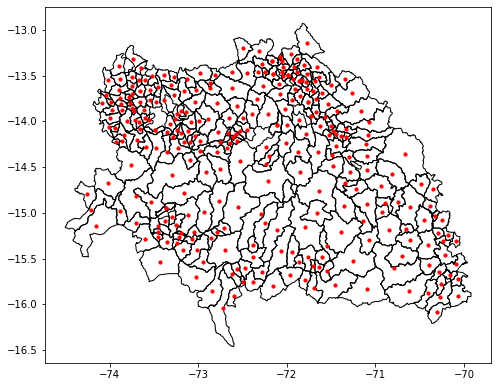

In [117]:
f, ax = plt.subplots(figsize=(8,8))

data_geo['geometry'].plot(color='none', edgecolor='black', zorder=0.5, ax = ax)

data_geo['centroid'].plot(color = 'r', markersize=10, ax = ax)

<AxesSubplot:>

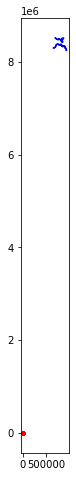

In [120]:
f, ax = plt.subplots(figsize=(8,8))

data_geo['geometry'].plot(color='none', edgecolor='black', zorder=0.5, ax = ax)

data_geo['Point'].plot(color = 'r', markersize=10, ax = ax)

mita_boundary.plot(color = 'b', markersize=10, ax = ax) 

In [121]:
mita_boundary.to_crs(epsg=4326,inplace=True)

Text(0.65, 0.7, 'Mita Boundaries')

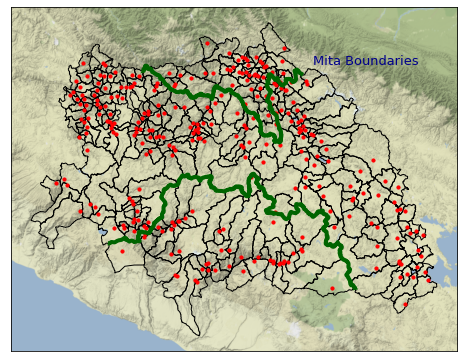

In [154]:
f, ax = plt.subplots(figsize=(8,8))

data_geo['geometry'].plot(color='none', edgecolor='black', zorder=0.5, ax = ax)

data_geo['Point'].plot(color = 'r', markersize=10, ax = ax)

mita_boundary.plot(color = 'darkgreen', linewidth=4, ax = ax) 

cx.add_basemap(ax, crs="EPSG:4326", source=cx.providers.Stamen.TerrainBackground, attribution = False, zoom = 10)

plt.xticks([])
plt.yticks([])

# Añadir texto

f.text(0.65,0.7,'Mita Boundaries',color = 'darkblue', size = 13,
        bbox=dict(facecolor='none', edgecolor='none', pad=5.0)) # bbox: añade una caja al texto, pad : largo y ancho de la caja

# añadir etiquetas 

point = mpatches.Patch(color='red', label='Treatment')
bound = Line2D([0], [0], label='Mita boundaries', color='darkgreen')

# handles.extend([main_lines, other_lines, treat,cont, buffer])

plt.legend(loc='upper left',
           title = "",frameon=True, handles=[main_lines, other_lines, treat,cont, buffer],
            bbox_to_anchor=(0, 0.15), prop={'size': 10.5})

In [60]:
#gpd.tools.geocode("PUCP Peru, Avenida Universitaria, 15032, San Miguel, Lima")